# Distances and metrics
Focus session 20.03.2024

In [2]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import pandas as pd

### Distance between two points A and B

#### Some preparation...

In [3]:
def point(x, y):
    return np.array([x,y])
def plotdot(dot, color="black"):
    plt.plot(dot[0], dot[1], marker="o", color=color)
def plotline(dot1, dot2, color="black", linestyle="-"):
    plt.plot([dot1[0], dot2[0]], [dot1[1], dot2[1]], color=color, linestyle=linestyle)
def plotvector(startpoint, endpoint, color="black"):
    plt.arrow(startpoint[0], startpoint[1], 
              endpoint[0]-startpoint[0], endpoint[1]-startpoint[1], 
              color=color,
              head_width=norm(startpoint-endpoint,2)/80)
def plotsystem(minx, maxx, miny, maxy, color="black"):
    plotvector(np.array([minx,0]), np.array([maxx,0]), color=color)
    plotvector(np.array([0,miny]), np.array([0,maxy]), color=color)

#### Define points A and B

In [4]:
A = point(-1, 3)
B = point(3,1)
O = point(0,0)

#### Plot points A and B

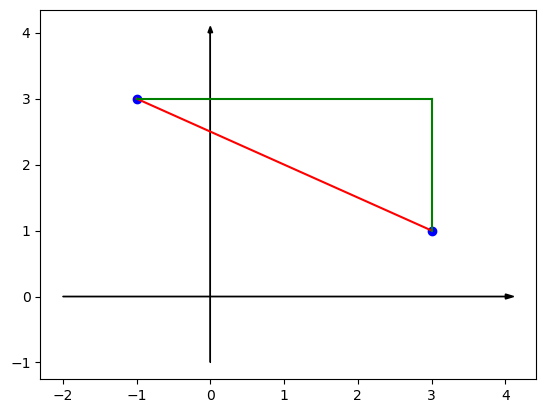

In [7]:
plotdot(A, "blue")
plotdot(B, "blue")
plotsystem(minx=np.array([A[0], B[0], 0]).min() -1,
           maxx=np.array([A[0], B[0], 0]).max() +1,
           miny=np.array([A[1], B[1], 0]).min() -1,
           maxy=np.array([A[1], B[1], 0]).max() +1)
plotline(A, B, color="red")
plotline(A, A + np.array([B[0]-A[0], 0]), "green")
plotline(B, B + np.array([0, A[1]-B[1]]), "green")

#### Calculate differential vector

$ x = B[0] - A[0] = 3 - (-1) = 4 $ <br>
$ y = B[1] - A[1] = 1 - 3 = -2 $ 

In [9]:
vectorAB = B-A
vectorAB

array([ 4, -2])

#### Calculate the distance between A and B manually

$ d(A,B) = \sqrt[2]{x^2 + y^2} $

In [11]:
def calculate_euclidean_distance(dot1, dot2):
    vdiff = dot1 - dot2
    return np.sqrt(vdiff[0]**2 + vdiff[1]**2)

calculate_euclidean_distance(A, B)

4.47213595499958

#### Test the function

In [12]:
import pandas as pd
xy = []
for x in range(-100, 101):
    for y in range(-100, 101):
        xy.append([x, y])
dots = pd.DataFrame(data=xy, columns=["x", "y"])
dots

,x,y
0,-100,-100
1,-100,-99
2,-100,-98
3,-100,-97
4,-100,-96
...,...,...
40396,100,96
40397,100,97
40398,100,98
40399,100,99


In [13]:
dots["distance_to_origin"] = [calculate_euclidean_distance(point(dots.loc[row,"x"], dots.loc[row,"y"]), O) for row in dots.index]
dots

,x,y,distance_to_origin
0,-100,-100,141.421356
1,-100,-99,140.716026
2,-100,-98,140.014285
3,-100,-97,139.316187
4,-100,-96,138.621788
...,...,...,...
40396,100,96,138.621788
40397,100,97,139.316187
40398,100,98,140.014285
40399,100,99,140.716026


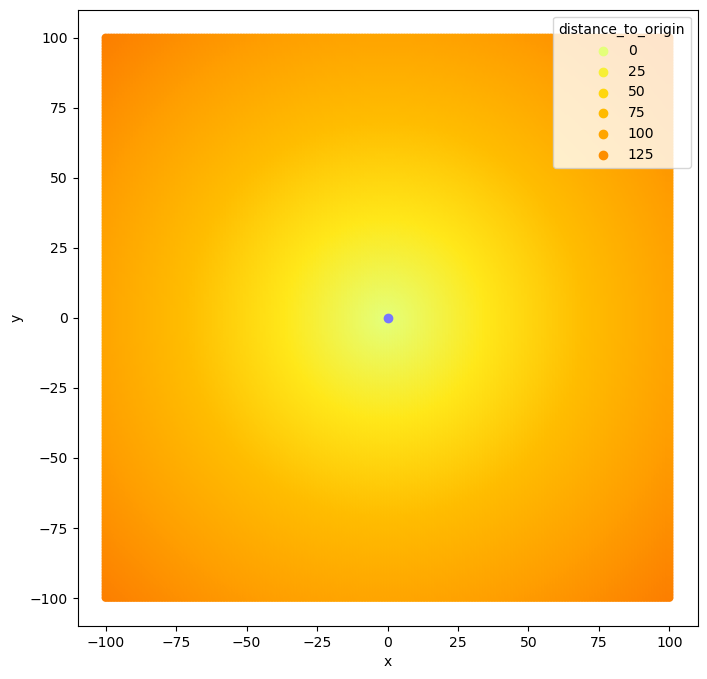

In [16]:
# Visualize the distances
import seaborn as sns
P = O
fig, ax = plt.subplots(1,figsize=(8,8))
sns.scatterplot(data=dots,x="x",y="y",hue="distance_to_origin",palette="Wistia",ax=ax,edgecolor="none")
plotdot(P, "#7777ff")

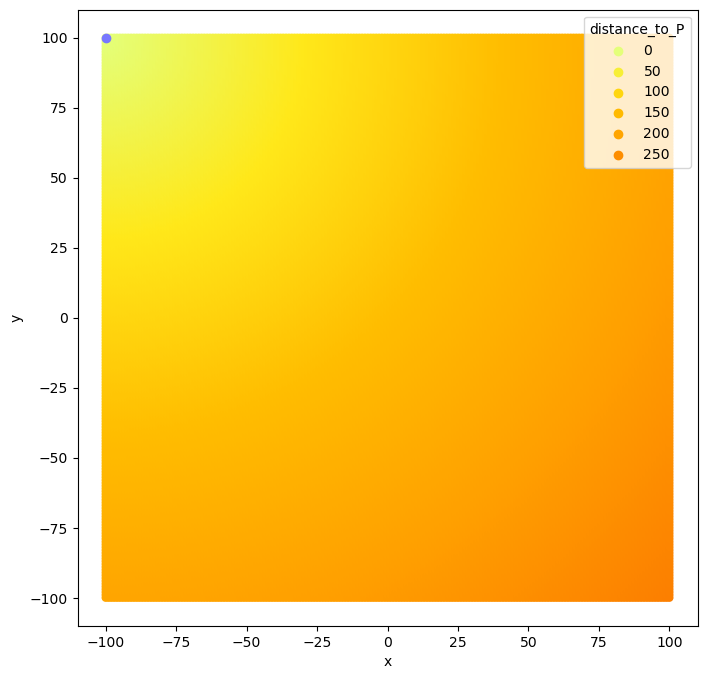

In [18]:
import seaborn as sns

# Set point P
P = point(-100, 100)

# Calculate distances between every grid point and P
dots["distance_to_P"] = [calculate_euclidean_distance(point(dots.loc[row,"x"], dots.loc[row,"y"]), P) for row in dots.index]

# Visualize the distances
fig, ax = plt.subplots(1,figsize=(8,8))
sns.scatterplot(data=dots,x="x",y="y",hue="distance_to_P",palette="Wistia",ax=ax,edgecolor="none")
plotdot(P, "#7777ff")

## What makes the euclidean distance a metric?

#### Wait... what IS a metric in the first place?

A measure $d(A,B)$ (distance between two points A and B) is called a metric if:
* $d(A,B)\: \ge 0 \:$ AND $\: d(A,B) = 0 \: \Leftrightarrow \: A = B \:$ (positive definite)
* $d(A,B) = d(B,A)$ (symmetry)
* $d(A,B)\le d(A,C)+d(C,B)$ (triangle inequality)

#### Test for symmetry

In [19]:
dAB = calculate_euclidean_distance(A, B)
dBA = calculate_euclidean_distance(B, A)

print(dAB)
print(dBA)

4.47213595499958
4.47213595499958


#### Test for triangle symmetry

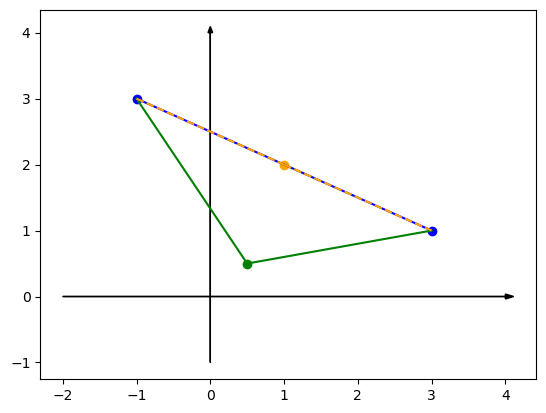

In [24]:
plotsystem(minx=np.array([A[0], B[0], 0]).min() -1,
           maxx=np.array([A[0], B[0], 0]).max() +1,
           miny=np.array([A[1], B[1], 0]).min() -1,
           maxy=np.array([A[1], B[1], 0]).max() +1)
plotdot(A, "blue")
plotdot(B, "blue")
C = point(0.5, 0.5)
D = point(1, 2)
plotdot(C, "green")
plotdot(D, "orange")

plotline(A, B, "blue")
plotline(A, C, "green")
plotline(C, B, "green")
plotline(A, D, "orange", "--")
plotline(D, B, "orange", "--")

In [25]:
# Calculate and compare dAB, dAC+dCB, dAD+dDB
dAB = calculate_euclidean_distance(A, B)
dAC = calculate_euclidean_distance(A, C)
dCB = calculate_euclidean_distance(C, B)
dAD = calculate_euclidean_distance(A, D)
dDB = calculate_euclidean_distance(D, B)

print(f"dAB       = {dAB}")
print(f"dAD + dDB = {dAD + dDB}")
print(f"dAC + dCB = {dAC + dDB}")

dAB       = 4.47213595499958
dAD + dDB = 4.47213595499958
dAC + dCB = 5.15154392492244


#### What if it's not 2D but 3D, 4D,...?

In [27]:
# Define x, y and z of a 3D vector
x = 4
y = 2
z = 2

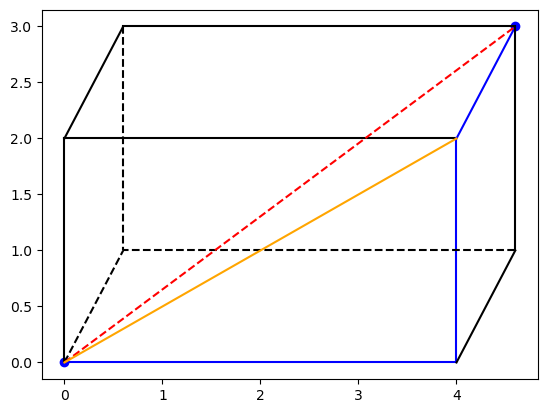

In [30]:
# Plot it
flb = np.array([0,0]) # front left bottom
frb = np.array([x,0]) # front right bottom
frt = np.array([x,y]) # front right top
flt = np.array([0,y]) # front left top
s = np.array([z*0.3,z*0.5]) # perspective shift
blb = flb + s # back left bottom
brb = frb + s # back right bottom
brt = frt + s # back right top
blt = flt + s # back left top

plotdot(flb, color="blue")
plotdot(brt, color="blue")
plotline(flb, frb, color="blue")
plotline(flb, flt)
plotline(flb, blb, linestyle="--")
plotline(frt, flt)
plotline(frt, frb, color="blue")
plotline(frt, brt, color="blue")
plotline(blt, flt)
plotline(blt, brt)
plotline(blt, blb, linestyle="--")
plotline(brb, blb, linestyle="--")
plotline(brb, frb)
plotline(brb, brt)

plotline(flb, brt, color="red", linestyle="--")
plotline(flb, frt, color="orange")

$ d_{orange} = \sqrt[2]{x^2 + y^2} $

$ d_{red} = \sqrt[2]{(d_{orange})^2 + z^2} $

$ d_{red} = \sqrt[2]{(\sqrt[2]{x^2 + y^2})^2 + z^2} $

$ d_{red} = \sqrt[2]{x^2 + y^2 + z^2} $

The euclidean distance is also called the $L_2$ metric.

### Other $L_p$ metrics

#### The $L_1$ metric - also called the Manhattan metric

Let's recapitulate: In euclidean space, the $L_2$ distance between two points A and B is <br>
$ L_2(A,B) = \sqrt[2]{x^2 + y^2 + ...} \: ,$ <br>
where $ \: x = B[0] - A[0], \: y = B[1] - B[1], \: ... $

The euclidean distance represents the distance of two points in a straight line, using Pythagorean triangles and therefore "squares and square roots".
Sometimes, the "effective distance" between two points is not a straight line, but is the direct sum of its x-, y-, ...-components:

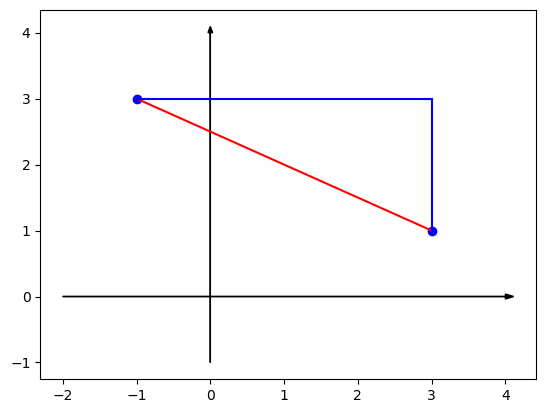

In [32]:
plotdot(A, "blue")
plotdot(B, "blue")
plotsystem(minx=np.array([A[0], B[0], 0]).min() -1,
           maxx=np.array([A[0], B[0], 0]).max() +1,
           miny=np.array([A[1], B[1], 0]).min() -1,
           maxy=np.array([A[1], B[1], 0]).max() +1)

plotline(A, B, color="red")
plotline(A, A + point(B[0]-A[0], 0), "blue")
plotline(B, B + point(0, A[1]-B[1]), "blue")

$ L_1(A, B) \: = \: \sqrt[1]{x^1 + \: y^1 \: + \: ...} \: = \: x + y \: + \: ... $

#### And now, the $L_p$ metrics in general

$ L_p(A, B) = \sqrt[p]{x^p + y^p + ...} $

In [33]:
def calculate_lp_dist(dot1,dot2,p=2):
    return(norm((dot1-dot2),p))

In [34]:
def plot_Lp_distance_to_P(dots, p, P):
    dots["Lp_distance_to_P"] = [calculate_lp_dist(point(dots.loc[row,"x"], dots.loc[row,"y"]), P, p) for row in dots.index]
    fig, ax = plt.subplots(1,figsize=(8,8))
    sns.scatterplot(data=dots,x="x",y="y",hue="Lp_distance_to_P",palette="hls",ax=ax,edgecolor="none")
    plotdot(P, "#7777ff")
    #plotsystem(dots["x"].min(),dots["x"].max(),dots["y"].min(),dots["y"].max(), color="black")

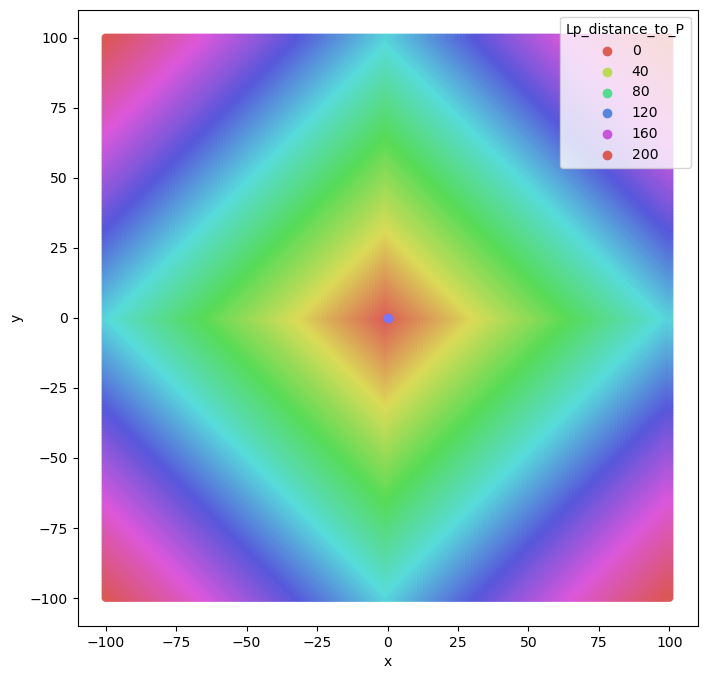

In [36]:
P = O
p = 1
plot_Lp_distance_to_P(dots, p, P)

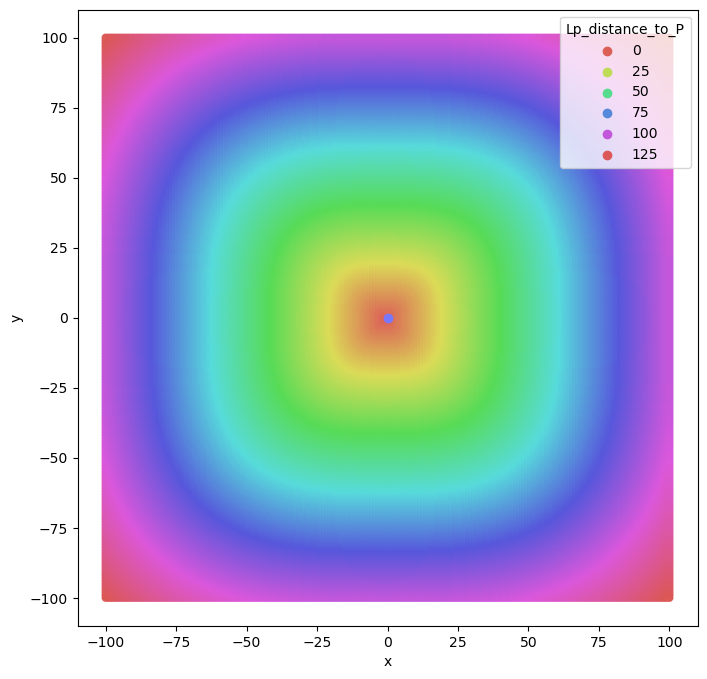

In [37]:
p = 3
plot_Lp_distance_to_P(dots, p, P)

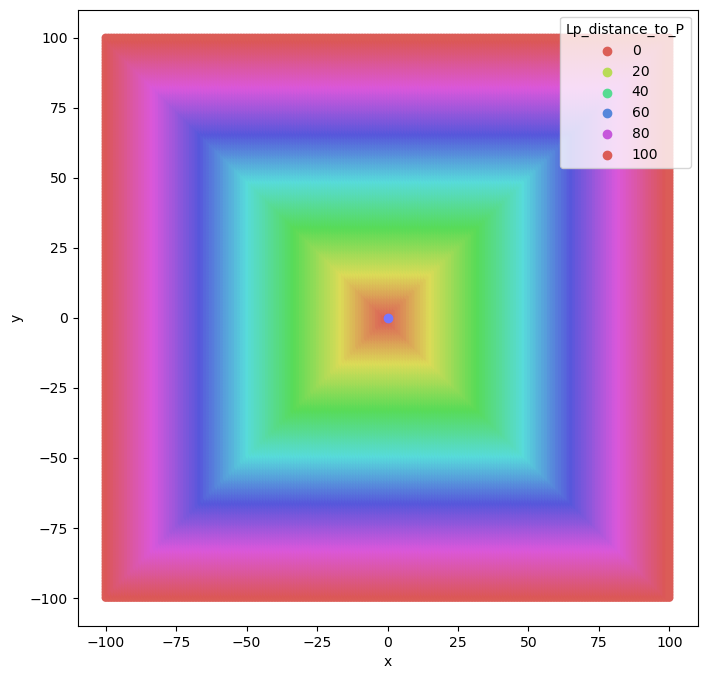

In [38]:
p = np.inf
plot_Lp_distance_to_P(dots, p, P)

# Let's sing together: "I am scaling..."